# DEEP LEARNING

## introduction

- Neural networks account for interactions really well
- Deep learning uses powerful neural networks
- Captures very complex interactions
- A neural network begins with an input layer - the predictors, and the output layer, which is the DV, and you have numerous hidden layers. 
- Each node in the hidden layer is an aggregate of inofrmation from the input layers data, and each node adds to the model's ability to capture interactions 


## Forward Propagation
- the example: the DV is the number of bank transactions
- the IVs - the number of children, and the number of accounts
- Each input node (IV) sends an input to each of the two hidden nodes
- the value of the first hidden node is the sum of the products of the INPUT value (i.e., score on the IV) times its loading to the hidden node
    - Add up these products (IV score x loading) for each loading to the hidden node
- We repeat this process for the hidden layer: 
    - Multiply each hidden node (its current value, based on the previous sum of products) with its loading to the output node, and add them together - to get the predicted value of the DV (we only have one hidden layer here)
- This is forward propagation - moving from left to right - we use the multiply and add (dot product)
- Forward propagation is performed for ONE DATA POINT AT A TIME
- The output is the prediction on the DV for that data point


In [1]:
import numpy as np

input_data = np.array([2,3]) #my predictor values on the 2 predictors

weights = {'node_0':np.array([1,1]), # TWO loadings from the two inputs to node 0 in hidden layer (from the 2 inputs)
          'node_1':np.array([-1,-1]), # loadings from the inputs to node 1 in the hidden layer (we have 2 hidden nodes)
          'output':np.array([2,-1]),} #loadings from the 2 hidden nodes to the output

# Compute the VALUE OF THE HIDDEN NODES 0 and 1
node_0_value = (input_data*weights['node_0']).sum() #get dot product for hidden node 0: i.e., 2*1 + 3*1
node_1_value = (input_data*weights['node_1']).sum() #get dot product for hidden node 1: i.e., 2*-1 + 3*-1

print(node_0_value, node_1_value)

# Convert the values of the hidden nodes into an array
hidden_layer_values = np.array([node_0_value,node_1_value]) #we get an array of the values on each of the two hiddennodes
print(hidden_layer_values)


#output value

output = (hidden_layer_values * weights['output']).sum() #  5*2 + -5*-1 = 15
#of the hidden node values multiplied by their respective loadings to the poutput
print(output)


5 -5
[ 5 -5]
15


### examples - performing forward propagation on small neural networks

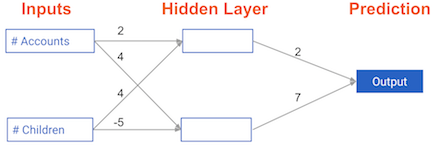

Coding the forward propagation algorithm
In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:

* Each data point is a customer. The first input (IV - node) is how many accounts they have, and the second input (IV - node) is how many children they have. 
* The model will predict how many transactions the user makes in the next year (DV). 

* The input data has been pre-loaded as input_data, and the weights are available in a dictionary called weights. The array of weights for the first node in the hidden layer are in weights['node_0'], and the array of weights for the second node in the hidden layer are in weights['node_1'].

* The weights feeding into the output node are available in weights['output'].



In [2]:
# Value of hidden node 0 and node 1 - sum of the (IV-value*loading) products for both IVs

input_data = [4,5]

node_0_value = (input_data * weights['node_0']).sum()

node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])


# Output (predicted) value is the sum of the (NODE-values*loadings) for the two hidden nodes
output = (hidden_layer_outputs * weights['output'])

# Print output
print(output)



[18  9]


### Activation Functions

- Activation functions allow you to capture non-linearities in the relationship between predictors and the DV
- These functions are applied to the INPUT NODE VALUES (i.e., the scores on the predictors/IVs)
    - transforming these scores to a value
    - this transformed value is either stored in the input (IV) node itself, or the node's output (i.e., the value of the hidden node)
- Today we use a rectified linear activation function, which transforms the hidden node values



In [3]:
import numpy as np

# Below - scores of ONE observation on the two IV's/predictors

input_data = np.array([2,3]) 

weights = {'node_0':np.array([1,1]), 
          'node_1':np.array([-1,-1]), 
          'output':np.array([2,-1]),} 

# Get the value for both hidden nodes

node_0_input = (input_data*weights['node_0']).sum() # Get dot product for hidden node 0
node_0_output = np.tanh(node_0_input)               # Here, we transform the value of the first hidden node

# We are transforming the value of the hidden node 0 after calculating its dot product
# We are using the TANH not RELU function here

# Repeat for the second hidden node's value

node_1_input = (input_data*weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)

# Create array of values on the two hidden nodes

hidden_layer_output = np.array([node_0_output,node_1_output]) #

# Calculate the final predicted value on the DV

output = (hidden_layer_output * weights['output']).sum() #get the dot product 
#of the hidden node values multiplied by their respective loadings to the poutput



## The Rectified Linear Activation Function
- As shown above, an "activation function" is a function applied at each hidden node, transforming its value. 
- It converts the hidden node's input into some output.

- The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks.
- It is another type of transformation to the value of hidden node
- This function takes a single number as an input, returning 0 if the input (i.e., the value on the predictor) is negative, and returns the input value (i.e., value on the predictor) if that input is positive.

Here are some examples:

relu(3) = 3 

relu(-3) = 0 

In [4]:
# Remember, the activation function converts a node's input (from an input noode) to some output value
# This becomes the value of the hidden node 

# Below is the relu function - it returns the maximum of either the input value and 0.
# So if the input is negative, 0 is returned. If it is not 0, that value is returned and becomes the output 
# Output, meaning the value for that hidden node

def relu(input):

    output = max(input, 0)

    return(output)
        
# Calculate the value for both HIDDEN NODES - using the relu functino to transform the dot product

node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)  # Transform that value using the relu function


node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input) # Transform that value using the relu function

# Create the hidden node values array

hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate the output (predicted score on the DV)

model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)



10


### Applying the network to many observations/rows of data
* so far, we have only been generating predictions for a single data point
* Below we define a function to generate predictions for multiple data points
* the function takes in a numpy array and a dictionary of weights



In [5]:
def predict_with_network(row, weights):
    
    node_0_input = (row*weights['node_0']).sum() # sum the products of each input with its loading to node 0
    node_0_output = relu(node_0_input) # transform the hidden node value
    
    node_1_input = (row*weights['node_1']).sum() # sum the products of each input with its loading to node 1
    node_1_output = relu(node_1_input) # transform the hidden node value
    
    hidden_layer_outputs = np.array([node_0_output,node_1_output]) # make the hidden node values an array
    
    input_to_final_layer = (hidden_layer_outputs*weights['output']).sum()
    model_output = relu(input_to_final_layer) # note, we are transforming the input to the final layer also
    
    return(model_output)

#create an array of 3 data points 
data = np.array([[1,2],[4,5],[-2,8]])

# apply the function in a for loop
for row in data:
    print(predict_with_network(row, weights))
    


6
18
12


## DEEPER NETWORKS

- In the example we have TWO hidden layers
- We calculate the raw hidden layer 1 nodes as before using dotproduct
- We transform them using the activation function
- Layer 1 nodes now become the "input" for the NEXT HIDDEN LAYER's nodes
- and we repeat the process of forward propagation on this second layer > to get the value for the output

### Representation learning
- Deep networks internally build representations of patterns in the data - sequentially building patterns with each layer
- This partially replaces the need for feature engineering
- Subsequent layers build increasingly sophisticated representations of raw data >> think of it as recreating the patterns in an image, and with each layer, the image becomes more and more detailed.
- When a neural network tries to predict an "image" - the first hidden layer builds patterns that are conceptually simple >> looking at simple patterns in the images (e.g., diagonal and straight lines)
    - this simple information is held in the individual values of the hidden nodes at the hidden layer
- Subsequent layers combine these simple patterns for more complex patterns in the data, like shapes
- The next layer integrates these simple input patterns, putting these lines and shapes together to form more complex representations
- We dont need to tell the model to look for these represnetations



In [6]:
#here we define a function that does the same thigns above but over two layers

weights_long = {'node_0_0': np.array([2, 4]),
 'node_0_1': np.array([ 4, -5]),
 'node_1_0': np.array([-1,  2]),
 'node_1_1': np.array([1, 2]),
 'output': np.array([2, 7])}

# the dictionary above - each key value pair is the loadings to that hidden layer node
# We have two hidden nodes in layer 1: node_0
# and two hidden nodes in layer 2: node_1

In [7]:

def predict_with_network_long(input_data):
    # Calculate values for hidden nodes 1 and 2 in LAYER 1
    node_0_0_input = (input_data * weights_long['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    
    node_0_1_input = (input_data * weights_long['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # CREATE ARRAY OF THE VALUES OF THE TWO HIDDEN NODES IN LAYER ONE
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    
    # Calculate values for hidden nodes 1 and 2 in LAYER 2
    # Note that the inputs are the VALUES ON THE HIDDEN NODES IN LAYER 1 (Held in the array: hidden_0_outputs)
    node_1_0_input = (hidden_0_outputs * weights_long['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    
    node_1_1_input = (hidden_0_outputs * weights_long['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # CREATE ARRAY OF THE VALUES OF THE TWO HIDDEN NODES IN LAYER TWO
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # MULTIPLY THE HIDDEN NODE (LAYER 2) VALUES WITH THE WEIGHTS TO THE OUTPUT, and SUM THESE PRODUCTS
    model_output = (hidden_1_outputs * weights_long['output']).sum()

    # Return model_output
    return(model_output)

input_data = [23,44]

output = predict_with_network_long(input_data)
print(output)

1554


# The need for optimisation

- Let's use a simple 1 layer model
- Lets use the identity function (so no activation function)
- Say we get a prediction of 9, but the true value of the outut is 13
- If we change the weights/loadings, we can change the predicted value
- So changes in weights can improve prediction
- When we have many observations, error is more likely - we use a LOSS FUNCTION to calculate a measure of error > the loss function aggregates the errors from all individual observations into a single number (e.g., like an RMSE)
    - it is a measure of the model's predictive performance (loss in prediction)
    - In the regression context, the loss function is the MSE
- Different combinations of weights lead to changes in the loss function
- We want the combination of weights that lead to the lowest loss function value
- The loss function is calculated using gradient descent > we want to minimise the value of the loss function

## gradient descent > get to the lowest point 
- Steps - start at a random point
- When you are somewhere flat, find a slope, and take a step downhill
- And do this til you get to the bottom

### The loss function 
- We want the weights (on x axis) where the loss function (y) is at its lowest
- At a particular value for w (weights value), we calculate the SLOPE on the loss curve
    - This is the derivative of that value (differentiated value)
- From that value we decide where we want to step to next, to reduce that slope
- if the slope is positive (very steep) > then we move in the direction OPPOSITE of the slope for the value of w --> i.e., we move in a negative direction for W - i.e., reduce the value of w
    - We keep moving left (reducing w) as the slope gets flatter and flatter (and less positive)
    - Until the slope is flat, and here, we have reached the minimum value of the loss function
    - the loss function is at its lowest
- And we have found the best value for W that minimises the loss function

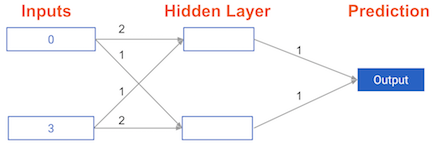


In [8]:
# The data point you will make a prediction for

input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Predict the DV value using the SINGLE LAYER predict_with_network function (earlier in the output)

model_output_0 = predict_with_network(input_data, weights_0)
print("predicted value:", model_output_0)


# Calculate error: error_0 - it is the difference between the predicted and the action
# i.e., 9 - 3 = 6

error_0 = model_output_0 - target_actual
print("residual:",error_0)



predicted value: 9
residual: 6


In [9]:

# Create weights that cause the network to make perfect prediction (3): weights_1
# These weights differ from those above

weights_1 = {'node_0': [2, 1],
             'node_1': [1, -2],
             'output': [1, 1]
            }

# Make prediction using new weights, and use the same function defined earlier to get predicted values

model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1

error_1 = model_output_1 - target_actual
print(model_output_1)


# Print error_0 and error_1
print("error with first set of weights:",error_0)
print("error with second set of weights:",error_1)

# This all shows that by modifying the weights, we can reduce the error in prediction
# THus, minimise the loss function

3
error with first set of weights: 6
error with second set of weights: 0


### Scaling up to multiple data points
* You've seen how different weights will have different accuracies on a single prediction. 
* But usually, you'll want to measure model accuracy on many points. You'll now write code to compare model accuracies for two different sets of weights, which have been stored as weights_0 and weights_1.


* input_data is a list of arrays. 
* Each item in that list contains the predictor value data to make a single prediction. 
* Target_actuals is a list of numbers - the TRUE labels , true value on the DV



In [10]:
from sklearn.metrics import mean_squared_error

# Create list to hold predicted values using the first set of weights

model_output_0 = []

# Create list to hold predicted values using the second set of weights

model_output_1 = []


# Set up my input data - a 2D numpy array, formed from a list of lists. Each list is a data row with 2 IV values

input_data = np.array([[1,2],[4,5],[-2,8]])

# Set up my targets 

target_actuals = np.array([15,18,14])

# Now run the for loop on each ROW of data in the input data
# applying the predict_with_network function on that row of data
# Doing this function TWICE, using the two weight sets (defined earlier)

for row in input_data:
    
    model_output_0.append(predict_with_network(row,weights_0)) # append predicted value using the first weight set
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1)) # append predicted value using the second weight set

# calculate the MSE, using the ACTUAL DV values, and the list of predicted values
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Do the same for the second set of predicted values
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: {}".format(mse_0))
print("Mean squared error with weights_1: {}".format(mse_1))



Mean squared error with weights_0: 44.333333333333336
Mean squared error with weights_1: 82.0


## Gradient Descent continued

- In gradient descent, we repeatedly changed the value of 0 for the weights (w), to keep flattening the slope
- Until we got to the lowest point on the loss function - and the value of 0, where the slope is flat
- If the slope is positive - we are still high on the loss function (the curve), which means we need to move to a w that is lower - moving in the negative direction.

But how far do we move in the negative direction for w?
- The typical thing is to SUBTRACT the slope from the current value of W (weight)
- Too big a step in the opposite direction could lead us astray
    - so we take a smaller step

### SOLUTION: LEARNING RATE
- We update the weight instead by subtracting the LEARNING_RATE * SLOPE from the current weight
- Usually set to 0.01, which ensures smaller steps
- So a smaller learning rate, will lead to a smaller change in the slope
    


### Example - How do we calculate the slope?
- Tke a single path from one node to another > let's say the hidden node to the output (and we have ONE hidden layer)
- And add single weight joining them
- The actual TARGET value is 10
- To calculate the slope for a particular weight, you need to multiply:

1. 2*(predicted value - actual value) IN OTHER WORDS: 2 * error
   - so it is the <u>predicted output node value, minus the actual output node's value TIMES 2</u>

2. The value of the node that feeds into the weight (i.e., <u>the value of the input node</u>) >> the value of the node we are feeding from

3. The <u>slope of the activation function of the input node's value</u> >> WHEN using the RELU activation function, this value is 1

<b>Multiply all these values together</b>

### Now improve that weight
- The slope is at -24, hence the loss function is high, in the negative direction
- The current weight is 2; 
- The slope is negative (-24), so we want to move in the positive direction for the weight, w
- We subtract from the current weight: learning_rate * current slope 

= 2 - (-24 * 0.01)
= 2.24

- Now we repeat the neural network, to get the new predicted value; examine the residual; calculate the slope again to see if it has reduced, and then make the adjustments until the slope is reduced to 0


In [11]:
# We now want to caclulate the slopes and update weights
# This is a simple example with TWO WEIGHTS (TWO INPUTS), and only an INPUT LAYER and OUTPUT LAYER 

import numpy as np

weights = np.array([1,2])
input_data=np.array([3,4])
target=6 # this is the value of the DV

learning_rate=0.01

#obtain dot product to get predicted target value

predicted_target=(weights * input_data).sum()

#calculate error

error=predicted_target - target
print(error)

print(target)

5
6


In [12]:
# We now use this ERROR value to get the current slope / gradient - An array of slopes is called a GRADIENT

gradient = 2 * error * input_data 

# Recall above - multiply 2 * (residual: predicted - actual) * value of input node * 1 (relu slope is 1)
# Because we have two weights (two input nodes) this will yield two slopes 

print(gradient)

[30 40]


In [13]:
# To get the updated weights - CURRENT WEIGHT - (LEARNING RATE * CURRENT SLOPE)

weights_updated = weights - (learning_rate*gradient) #subtract the SLOPE*learing rate from the current weights

print("the updated weights are:", weights_updated)


the updated weights are: [0.7 1.6]


In [14]:
# Use the current array of weights to get the new predicted value (via dotproduct)

predicted_target_updated = (weights_updated * input_data).sum()

print("the NEW predicted value is:",predicted_target_updated)

the NEW predicted value is: 8.5


In [15]:
#calculate new residual

error_updated = predicted_target_updated - target 
print("the new residual is:", error_updated)

# then use this new residual to recalculate the current slope, and then recalculate weights

the new residual is: 2.5


### Calculating slopes
- Below we practice calculating slopes. 
- When plotting the mean-squared error loss function against predictions, the slope is 2 * x * (y-xb)
    - Or 2 * input_data (value of input node) * error (predicted - actual DV value). 
    - Note that x and b may have multiple numbers (x is a vector for each data point, and b is a vector).
        - x refers to the value of input nodes - hence there are multiple X values
        - b refers to the current weight values - there are as many weights as inputs
        - xb is the dot product between input nodes and weights to get the PREDICTED VALUE of the DV
    - In this case, the output will also be a vector, which is exactly what you want.


In [16]:
#set up input data - one person
input_data = np.array([3,4])

In [17]:
#Set up the target values - two actual DV scores

actual = 6

In [18]:
weights = np.array([1, 2])

In [19]:
# The steps are to calculate:

# 1. the predicted value on the DV

pred = (weights * input_data).sum()
print("the predicted value is", pred)

# 2. The next step is to calculate the residual

residuals = pred - actual
print("the residual is:",residuals)

# 3. The next step is to calculate the current slope value, the GRADIENT of slopes
# Two slopes are returned - one for each weight

gradient = 2 * (input_data * residuals)

print(gradient) 

the predicted value is 11
the residual is: 5
[30 40]


### Now we can update the weights using the current slope and the learning rate

In [20]:
learning_rate = 0.01

# New weights equal to the current weights - learning rate * slope

updated_weights = weights - (learning_rate*gradient)

print("the updated weights are:",updated_weights)

# Each person has two weights
# Each person has a DIFFERENT PAIR of weights this time

the updated weights are: [0.7 1.6]


In [21]:
# Now we can get new predictions and residuals

updated_pred = (input_data*updated_weights).sum()
print("the updated predicted value is", updated_pred)

updated_residual = updated_pred - actual

print("the updated residual is",updated_residual) # the residual has DECREASED!!! 

the updated predicted value is 8.5
the updated residual is 2.5


### Making multiple updates to weights

* We will define a function to make multiple updates to weights
* this function will require making a function to calculate the current slope

In [22]:
# set up input data

weights = np.array([3,-0.5])
input_data=np.array([3,4])
target=6 # this is the vaue of the DV
learning_rate=0.01

In [23]:
# first define a function to get the slope


def get_gradient(input_data,target,weights):
    
    predicted = (input_data*weights).sum()
    
    predicted = relu(predicted)
    
    residual = target - predicted
    
    gradient = 2 * residual * input_data
    
    return gradient



In [24]:
gradient = get_gradient(input_data,target,weights)

def get_weights(weights,gradient,learning_rate):
    update_weights = weights - learning_rate*gradient
    return update_weights
    
get_weights(weights,gradient,learning_rate)

array([ 3.06, -0.42])

In [25]:
# Create a function to get the MSE

#weights = np.array([1, 2])

def get_mse(input_data,target,weights):
    
    predicted = (input_data*weights).sum()
    
    predicted = relu(predicted)
    
    residual = target - predicted
    
    mse = residual**2
    
    return predicted



In [26]:
# We want to get 20 updates - so we create a for loop, that performs the above functions 20 times, 
# Appending the mse each time

mse_values = []

learning_rate = 0.01

for i in range(20):
    
    gradient = get_gradient(input_data,target,weights)
    
    weights = weights - (learning_rate*get_gradient(input_data,target,weights))
    #dont say "updated_weights" because we want to loop over this function
    
    mse = get_mse(input_data,target,weights) #calculate the mse first before updating the weights
    
    mse_values.append(mse)

In [27]:
#let's plot the mse 

import matplotlib.pyplot as plt

plt.plot(mse_values)
plt.xlabel("iteration")
plt.ylabel("mse")
plt.show()

<Figure size 640x480 with 1 Axes>

## BACK PROPAGATION

- Takes the error from the output layer and propagates that backwards into the NN to the hidden layers back to the input layer
- This allows the gradient descent to UPDATE ALL WEIGHTS across the neural network 
    - by getting the gradient for all weights - i.e., the SLOPES for all weights
- recall the gradient is an array of slopes for each weight

### The goal
- To estimate the slope of the loss function with reference to each weight:
    - The slope values based on the current weights (one slope per weight - the entire group of slopes is the gradient)
    - We want estimates of w that will minimise the value of the slope (slope = 2 * residual * input_data, where the weights are used to calculate the value of the residual)
    - I.e., we want estimates of w that will minimise the residual, which will then minimise the value of the slope
    
### What we begin with:
- We always begin with FORWARD propagation to calculate the predictions and residuals using the current weights
- Having obtained a CURRENT PREDICTED VALUE for the DV, we can now do back propagation
- This involves going back one layer at a time

### What do we need?
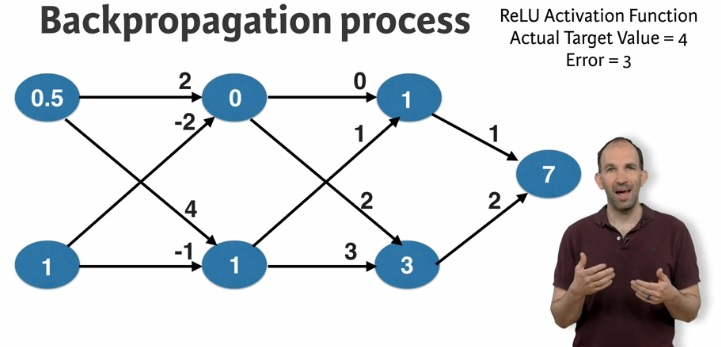

Let's assume we are at the second last layer (the second hidden layer, of which there are two): 
1. We need, the input node value feeding into that weight
    - for input layer nodes - the node values are simply the predictor values
    - for hidden layer nodes - the node values are obtained via the dotproduct algorithms used earlier, and then transformed with the activation function - obtained from the <u>forward propagation</u> process
        - (i.e., the relu function - i.e., if the dotproduct is negative, the value of the node will be 0, if positive, it returns the dotproduct)
        
        
2. The slope for that current weight value as calculated above - (2 * error * input_node value) [with respect to its output node, i.e., the current slope for that weight]


3. The slope of the activation function for the current weight's output (when using the RELU, this value is 1 >>)
    - this is multiplied by the value in (2) to get the final value of the slope
    
    
* WE MUST ALSO KEEP TRACK OF THE SLOPE OF NODE VALUES - which is different from the slope of the weights that we have been calculating.
* the slope of node values are the SUM OF THE SLOPES FOR ALL WEIGHTS that COME OUT OF THEM!


* With each backward propagation, there is a forward propagation to update the predicted value and ERROR, which is then used again in backward propagation to update weight values

### BACK PROPAGATION example
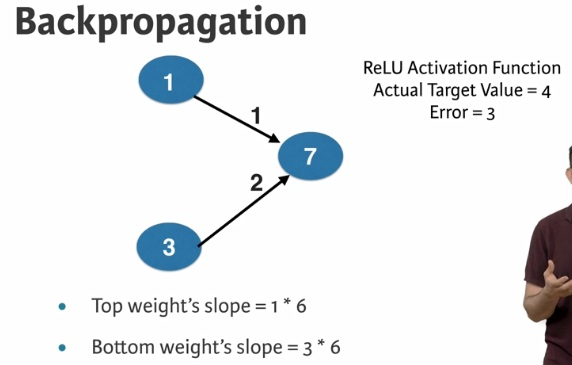

- We have two input nodes, their values are 1 and 3; Their weights are 1 and 2 respectively
- The ouput node is at 7, the actual value is 4 (error/residual is 3)
- The slope will be 2 * error = 2 * 3 = 6
- The slope of the activation function is 1, since the output is POSITIVE
- The gradient is the slope times each input value - so the gradient will consist of two slopes:
    - 2 * 3 * 1 (input of node 1 was 1) = 6
    - 2 * 3 * 2 (input of node 2 was 2) = 18
- So we now have two slopes, one for each of the weights

### NOW LETS GO 1 LEVEL BACK
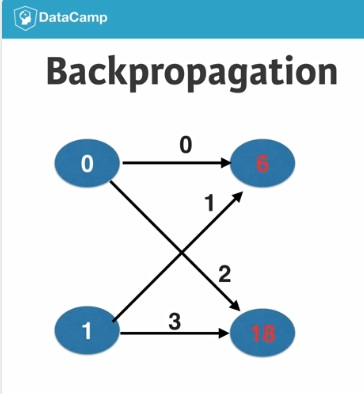

- The gradient of the current nodes are now at 6 and 18 respectively (nodes on the right)
    - each of those two output nodes has TWO INCOMING WEIGHTS
    - Coming from two input nodes (the nodes on the left)
- Now we want to calculate the slopes for these FOUR weights in the diagram
    - the first weight on the top - has a current weight of 0
    - its gradient will be:
        - INPUT NODE VALUE * OUTPUT NODE SLOPE * SLOPE OF ACTIVATION FUNCTION
        - Because the dot-product is positive (i.e., 0 x 0 + 1 x 1 = 1), then the activation function is 1. If the dot-product was -ve, it will be 0. 
        - the gradient is thus 0 * 6 * 0 = 0
   - the second weight coming into the top output node (loading of 1):
       - the gradient is thus 1 * 6 * 1 = 6
   - the third weight (with the loading of 2), the gradient is:
       - 0 * 2 * 1 = 0
  - the last weight (loading of 3), the gradient/slope is:
      - 1 * 18 * 1 = 18
- Having obtained these back-propagated slopes, we can now update the weights using the learning rate (i.e., the weights - learning_rate x slopes/gradient)
      
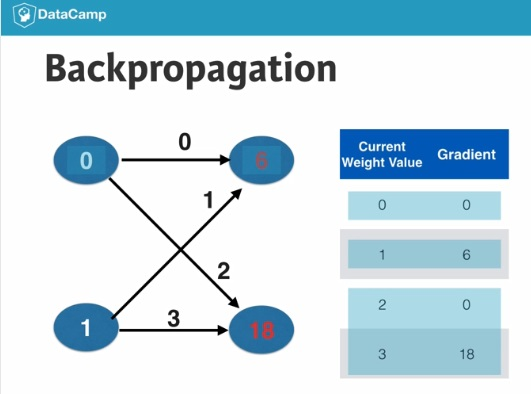


# RECAP
1. Start with random set of weights
2. Do forward propagation and get predicted value
3. Use back propagation to get the slope of the loss function with respect to each weight - in each layer - beginning from the last layer and moving outward
4. Update the weights by subtracting the product of the slope & learning_rate


### Notes
- It is common to calculate slopes on only a subset of the rows in the data called a BATCH
- we then use a different batch to calculate the NEXT update of back propagation
- so we can divide the dataset into 5 batches, leading to 5 backpropagations of weight updates
- and we start over from the beginning once all data is used - each cycle of the full training data is an EPOCH
- when slopes are calculated on ONE BATCH AT A TIME - this is stochastic gradient descent!


# Creating a KERAS MODEL

### 1. Specify ARCHITECTURE

1.  Specify the architecture - how many hidden layers, and nodes per layer, and the activation function at each later (relu/tanh)
2.  Compile the model - the loss function, and details about optimising the model
3.  FIT the model - the cycle of using the data and then backpropagation with the data
4.  PREDICT - use the model to make predictions



In [28]:
!pip install --user --ignore-installed --upgrade tensorflow-gpu

^C


In [ ]:
# !pip uninstall keras

In [ ]:
# !pip install keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# work with the hourly wages data

#!pip install --user --ignore-installed --upgrade tensorflow-gpu

import pandas as pd

import numpy as np

from keras.layers import Dense

from keras.models import Sequential


In [ ]:
wages = pd.read_csv("Datasets/Course 17 Deep Learning Python/hourly_wages.csv")

wages.head()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.plotting.scatter_matrix(wages)
plt.show()

In [ ]:
predictors = wages.loc[:,"union":]
predictors.head() # remove the DV column

In [ ]:
predictors.describe()

In [ ]:
len(predictors.columns) # we have 9 columns - variables - hence we have NINE input nodes
n_cols = len(predictors.columns)

n_cols

In [ ]:
# convery the predictors and outcome to numpy arrays

X = predictors.values
y = wages['wage_per_hour'].values

In [ ]:
# Model object >> Sequential method is used to build a model
# Sequential models have weights only to the nodes previously before it, and after it (no weights that jump layers)

model = Sequential()


In [ ]:
# DENSE means in this neural network, all the nodes in a previous layer connect to all the nodes in the next layer
# The first arguments are the number of nodes in EACH LAYER (here we have 100 nodes for the FIRST HIDDEN LAYER, 100 for second)

# Next, we specify the activation function - relu - on each HIDDEN LAYER

# We create SEPARATE model.add statements for each LAYER (after the first)

model = Sequential()

# 1. Input layer PLUS the first hidden layer
# On the Input layer code, we specify its shape - it has 9 nodes - the NUMBER OF COLUMNS in our dataset

model.add(Dense(100, activation='relu', input_shape = (n_cols,)))

# 2. The 2nd hidden layer

model.add(Dense(100, activation='relu'))

# 3. this is the OUTPUT layer - with only 1 node > the output prediction nodes

model.add(Dense(1)) 

In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error') # mean squared error for continuous DV

model.fit(X, y, epochs=10)

### Notes

### Specifying a model
* Now we get to work with your first model in Keras, and will immediately be able to run more complex neural network models on larger datasets compared to the first two chapters.

* To start, you'll take the skeleton of a neural network and add a hidden layer and an output layer - as we did above. We have the INPUT layer, ONE hidden layer, and ONE output layer

* We will then fit that model and see Keras do the optimization so your model continually gets better.


### THE EXAMPLE: WAGES
* As a start, we predict workers wages based on characteristics like their industry, education and level of experience.
* everything in the dataframe except for the target has been converted to a 2D numpy array matrix called predictors. 
* The target, wage_per_hour, is available as a NumPy matrix called target.



In [ ]:
# Below we repeat the commands - using different values for the nodes on each hidden layey 


# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

n_cols = X.shape[1]
print(n_cols)


model = Sequential()

# First hidden layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1))


# NOW WE FIT THE MODEL - STEP 2

### COMPILE METHOD

- 1.specify the optimiser, which controls the learning rate
    - "Adam" is a GO TO optimiser
    - It adjusts the learning rate and gradient descent using reasonable values
- 2.specify the loss function, the MSE is the main one for regression




In [ ]:
# Now compile the model

model.compile(optimizer='adam', loss='mean_squared_error')


# 3. FIT THE MODEL
- apply backpropagation and gradient descent with your data to update the weights

### SCALE YOUR DATA BEFORE FITTING 
- use Z score transformation

In [ ]:
#after compiling

# fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, 
# initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)

model.fit(X, y, verbose = 1, epochs=10) #array of predictor data, and array of target


In [ ]:
print("Loss function: " + model.loss)

# CLASSIFICATION WITH DEEP LEARNING

### Different things we do:
- We set the loss function to be: <b>CATEGORICAL_CROSSENTROPY</b>
- There are others but, this is most common - similar to log loss, where lower value is better (similar to any kind of loss)
- A lower value is better, but is itself not meaningful!
- We can also output a <b>classification ACCURACY</b> score in classification after each epoch
    - We add metrics=['accuracy'] - to see progress of the model - this value should be increasing with each epoch
- When we have a MULTINOMIAL CATEGORICAL OUTCOME - In the output layer >> there is a separate node for each possible outcome - i.e., each possible outcome compared to the reference group
    - So there will be 3 predicted probabilities, if my DV has 3 levels
    - This uses a SOFTMAX activation - ensures that predictions sum to 1 so that they can be interpreted as probabilities
    - With this type of analysis - we will have dummy variables
        - We either use get dummies, or one-hot encoding to get these






In [ ]:
# Use the titanic dataset
import pandas as pd

titanic = pd.read_csv("Datasets/Course 17 Deep Learning Python/titanic_all_numeric.csv")

titanic.head()

# age_was_missing is a boolean!!

#### ALL columns must be numeric

In [ ]:
titanic.survived.nunique()

X = titanic.drop("survived", axis=1).values
y = titanic.survived.values
y = to_categorical(y)

In [ ]:
y.shape

In [ ]:
# let's describe the data

print(titanic.describe())

titanic.survived = titanic.survived.astype("category")


In [ ]:
titanic.info()

### Last steps in classification models
* We will create a classification model using the titanic dataset
* We will need to create separate arrays for the IVs and DV (survived).
* Extract the number of features into an object called n_cols

> Here, you'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent. You'll learn more about this in the next chapter!

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical


In [ ]:
model=Sequential()
model.add(Dense(100, activation='relu',input_shape=(X.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd',loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X, y, epochs=10)

In [ ]:
# prepare the IV and DV arrays
X = titanic.iloc[:,1:].values
y = titanic.iloc[:,0].values

#get ncols, to input the number of input nodes
n_cols = X.shape[1]
print(n_cols)

y_outcome = to_categorical(y)

In [ ]:
y_outcome.shape

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical


# Make y categorical 
# this makes J columns for the number of category levels
# IT IS ESSENTIAL FOR MODEL TO WORK!

y = titanic.survived.values

y = to_categorical(y)


In [ ]:
y.shape

In [ ]:

model = Sequential()

# we have one input layer

model.add(Dense(32, activation = "relu", input_shape=(X.shape[1],)))

# output layer = HAS ONLY TWO NODES - for the outcomes: 1 = survive, 0 = dead
# Note also that softmas has been used which allows probabilities of each outcome to SUM TO 1

model.add(Dense(2, activation = "softmax")) # NOTE - for binary, we have TWO NODES (for each category level outcome)

# Compile the model
# use the sgd optimizer
# Use categorical cross_entropy as the loss function
# output the accuracy of classification at each epoch

model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])

# fit the model

model.fit(X, y, epochs=10)

### USING A TRAINING AND TEST SET?



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

model=Sequential()

model.add(Dense(100, activation="relu", input_shape=(X.shape[1],)))

model.add(Dense(100, activation="relu"))

model.add(Dense(2, activation="softmax"))

model.compile(optimizer=("sgd"), loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10)

In [ ]:
# try on test set

predictions = model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test[:,1],predictions[:,1]) # The Y_test is a 2D array - I extract the second column
# the predictions is also a 2D array, so I extract the second column



In [ ]:
# Save the model

from keras.models import load_model

model.save("Datasets/titanic_model2.h5")

# load model

my_model = load_model("Datasets/titanic_model2.h5")



In [ ]:
# FIT ON NEW DATA

my_model.fit(X,y, epochs=10)

## Using models after fitting them - to make predictions on NEW DATA

- Save a model after you trained it
- Reload it
- Make predictions on new data
- Alternatively, develop the model using a train,test split, evaluate via cross validation, refit and test on the TEST set


In [ ]:
# We will predict with the titanic prediction dataset

tit_xtest = pd.read_csv("Datasets/Course 17 Deep Learning Python/predict_titanic.csv",
                       header=None,
                       index_col=0)

# make this into an array

tit = tit_xtest.values

In [ ]:
# let's save the model we created above before predicting survival

from keras.models import load_model

model.save("Datasets/Course 17 Deep Learning Python/titanic_model.h5")



In [ ]:
# load up the model

my_model = load_model("Datasets/Course 17 Deep Learning Python/titanic_model.h5")

# view summary of the model

my_model.summary()

In [ ]:
# Get predicted data

predictions = my_model.predict(tit) # see above, the x_test values saved in an object called "tit"

# lets view the predictions output

print(predictions[0:10])

# first column is the prediction for died (survived = 0)
# second column is the prediction for survived (survived = 1)

# let's extract the survived = 1 column

survived_probabilities = predictions[:,1]

In [ ]:
#view the predicted probability of surviving

survived_probabilities

# MODEL OPTIMISATION
### Stochastic gradient descent

- This is about choosing the optimisation parameters - above, we used optimizer = 'stochastic gradient descent' (SGD)
- Below, we will iterate through various values of learning rates, which influence the SGD optimiser
- Hence, we use the SGD optimiser with different values of the learning rates
- It is hard to optimise because all weights are dependent on each other





In [ ]:
# Let's define a function that performs the specification of the model architecture (but not the compiling phase)

# I used tanh activation here (not relu)

def get_new_model(input_shape):
    model.add(Dense(100, activation='tanh', input_shape=(input_shape,)))
    model.add(Dense(100, activation='tanh'))
    model.add(Dense(2, activation='softmax')) #use softmax because the outcome is category
    return model


In [ ]:
# Prepare the data

X = titanic.iloc[:,1:].values
y = titanic.iloc[:,0].values
y_dv = to_categorical(y)

n_cols = X.shape[1]
print(n_cols)


In [ ]:
# set up a list of learning rates to test with the SGD optimiser
from keras import optimizers # if importing this package, then use "my_optimizer = optimizers.SGD(lr = lr)"
from keras.optimizers import SGD

lr=[.000001, .01, 1]

n_cols=10

# set up a loop to loop through the learning rates and compile and fit the model

for lr in lr:
    
    print("testing model with a learning rate of",lr)
    
    model = get_new_model(n_cols)  #input n_cols HERE!!!!!!!!!!
    
    #Set up the optimiser and its learning rate as an object
    
    my_optimizer = SGD(lr = lr)
    
    # In the compile phase, choose the optimizer, loss function, and accuracy (if desired)
    model.compile(optimizer = my_optimizer, loss="categorical_crossentropy", metrics = ['accuracy'])
    
    # Now we can fit the model
    model.fit(X, y_dv, epochs=5)

    
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) # options for the SGD optimiser

In [ ]:
# PRACTICING THE ABOVE

from keras import optimizers # if importing this package, then use "my_optimizer = optimizers.SGD(lr = lr)"
from keras.optimizers import SGD

def define_model_architecture(x_data,n_hidden_nodes,n_output_nodes,activation_func_hidden,activation_func_outcome):
    
    model.add(Dense(n_hidden_nodes, activation=activation_func_hidden, input_shape=(x_data.shape[1],)))
    
    model.add(Dense(n_hidden_nodes, activation=activation_func_hidden))
    
    model.add(Dense(n_output_nodes, activation=activation_func_outcome))
    

# Apply function 

# define_model_architecture(X,100,2,"relu","softmax")

# model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

# model.fit(X, y)

lr_range = np.logspace(4,0,10)

for learning_rate in lr_range:
    
    define_model_architecture(X,100,2,"relu","softmax")
    
    my_optimizer = SGD(lr=learning_rate)
    
    model.compile(optimizer=my_optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    
    model.fit(X_train,y_train, epochs=3)

In [ ]:
model

# The DYING NEURON PROBLEM
- When you use the relu activation function, the slope of the activation function will be negative
- The product will be negative - and so the weights continue to be negative
- These neurons contribute nothing to the model
- These neurons are DEAD


### Vanishing gradients
- Occurs when many layers have very small slopes (due to being on the flat part of the tanh curve)
    - tanh is an alternative activation function to transform node values
- In deep networks, because the slopes are small - updates to existing weights in back-propagation are close to 0
    - This is the vanishing gradient function
    - Thus inner weights don't gte updated very much
- So like the dead neuron problem - weights are not even updated and continue to be useless
- Maybe we should use an activation function that doesnt have a slope of 0 anywhere??
- These issues may lead to problems in models that are not getting better!
- As we see above (and in my MUCH EARLIER EXAMPLE) --> the models above are NOT improving


## Changing optimization parameters
- You'll now try optimizing a model at a very low learning rate, a very high learning rate, and a "just right" learning rate.
- You'll want to look at the results after running this exercise, remembering that a low value for the loss function is good.
- We already did this above - modifying the learning rate for the SGD optimizer


# MODEL VALIDATION
- Test our model on holdout data
- Commonly use a single validation split, not cross validation
- Why? Because CV is commonly used in very large datasets and too much compute time
- Single validation score is based on MANY data is reliable
- In the KERAS package we specify the holdout split in the model.fit command - rather than creating a train_test split



In [ ]:
# Below I fit the model on the titanic data

In [ ]:
# Below we are back to using the "adam" optimizer

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, y_dv, validation_split=0.3, epochs = 10) #holdout sample of 30% of the data

#we should KEEP training our model if validation scores continue to improve
#and STOP when the testing on the validation data no longer improves validation scores




# the val_acc is the accuracy and loss for the VALIDATION SET!

## EARLY STOPPING
- A model that hasnt improved after 3 epochs is unlikely to improve later on, and thus patience = 3 is a good time to stop
- We can set an early stopping criteria in the callbacks=[EarlyStopping(patience=2)]
- OR!! Since the optimization stops automatically when it isn't helping, you can also set a high value for epochs in your call to .fit(),


In [ ]:
from keras.callbacks import EarlyStopping


# We specify a paramater called patience -
# This means, how many epochs do we want to cycle through (and see no improvement) before we stop?
# We choose two epochs of NO CHANGE - then we stop model fitting

early_stopping_monitor = EarlyStopping(patience=2)





In [ ]:
#The early_stopping_monitor is PASSED IN THE MODEL.FIT command

model.fit(X, y_dv, validation_split=0.3, epochs=20,
         callbacks=[early_stopping_monitor]) #callbacks paramater takes a list if you want

#note we set a higher value of epochs beyond 10
#the model will train for 20 epochs, IF it continues to improve validation scores
#on the validation set!!

# Note that we stop after just 3 epochs!

# PRACTICE WITH VALIDATING MODELS AND EARLY STOPPING

In [ ]:
# let's work with the gapminder data

gap = pd.read_csv("Datasets/Course 14 Supervised Learning/gapminder.csv")

# let's make a categorical column for life child_mortality

gap['life_binary'] = pd.cut(gap['life'], 2) # this cuts the continuous "life" column into two groups (50th percentile)

gap.head()

In [ ]:
# We can replace the life_binary with get_dummies 
# The get_dummies function acts entirely on the life_binary column
# The alternative is to specify the data = gap, columns = ["life_binary"]
# Which will append the binary column to the dataframe (see below)

gap['life_binary'] = pd.get_dummies(gap['life_binary'], drop_first=True)

In [ ]:
gap.head() # We have no successfully converted the life_expectancy column into the binary

# We can now drop the "life" column

gap.drop("life", axis = 1, inplace=True)

In [ ]:
print(gap.head())

In [ ]:
#Let's convert the Region column into dummies, and append these to the dataset

#gap = pd.get_dummies(gap, columns = ["Region"], drop_first = True)
gap.head()

In [ ]:
# Let's create the X array and the Y array

y = gap.loc[:,"life_binary"].values
X = gap.drop("life_binary", axis = 1).values

y_dv = to_categorical(y) #make the array of categorical values (TWO COLUMNS - one for each value of the outcome)

In [ ]:
# We are ready to model the data

n_cols = X.shape[1] #extract the number of columns

# Now build the architecture

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# compile the model - use the original settings

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model - but save as an object
# Specify a validation test size of 25% of the data

results = model.fit(X, y_dv, validation_split = 0.25, epochs = 10)

In [ ]:
# Apply an early stopping criteria to the model fitting

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
results_2 = model.fit(X, y_dv, validation_split = 0.25, epochs=5, callbacks=[EarlyStopping(patience=2)])

# MODEL FITTING STOPS AFTER JUST 3 EPOCHS!

Evaluating model accuracy on validation dataset
Now it's your turn to monitor model accuracy with a validation data set. A model definition has been provided as model. Your job is to add the code to compile it and then fit it. You'll check the validation score in each epoch.

In [ ]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model > 100 nodes, 2 hidden layers >> TITANIC example
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model, use a validation holdout set of 0.3 - 10 epochs by default
hist = model.fit(predictors, target, validation_split=0.3)


In [ ]:
# Practicing with modified gapminder dataset

gap = pd.read_csv("Datasets/Course 9 Manipulating Data Frames/gapminder_tidy.csv")

gap2000 = gap.loc[gap.Year==2000,:]

gap2000.index=gap2000.Country

In [ ]:
gap2000.drop("Country", axis=1, inplace=True)

In [ ]:
gap2000 = pd.get_dummies(gap2000, drop_first=True)

In [ ]:
gap2000.head()

# create a binary outcome for the life expectancy column

print(gap2000.life.median())

gap2000['lifebinary'] = pd.cut(gap2000.life, [0,70.5, 140], labels=False)

In [ ]:
gap2000.head() # can see we have binary life expectancy column now

In [ ]:
X = gap2000.iloc[:,1:-1].values
y = gap2000.iloc[:,-1].values
y = to_categorical(y)

In [ ]:
model.add(Dense(100, activation="relu", input_shape=[X.shape[1],]))
model.add(Dense(100, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=['accuracy'])

model.fit(X, y, epochs=10, validation_split=0.3, callbacks=[EarlyStopping(patience=2)])

# Experimenting with wider networks
* We will create a model below, model_2, that has 100 nodes in both hidden layers
* model_1 only has 10 units
* For both models we plot the loss function score across the epochs
* The loss functions across the epochs are saved in the object model.history (if "model" is the name of the fitted model)
* The model.fit syntax includes verbose = False, to get fewer updates in the fitting stage

### MODEL 2 
* Create model_2 to replicate model_1, but use 100 nodes instead of 10 for the first two Dense layers you add with the 'relu' activation. 
* Use 2 nodes for the Dense output layer with 'softmax' as the activation because the outcome is categorical.
* We will compile model_2 as we have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].


In [ ]:
titanic = pd.read_csv("Datasets/Course 17 Deep Learning Python/titanic.csv")

titanic.head()


In [ ]:
predictors = titanic.iloc[:,1:].values
outcome = titanic.iloc[:,0].values
y = to_categorical(outcome)

In [ ]:
ncols = predictors.shape[1]

In [ ]:
# do model 1
model1 = Sequential()
model1.add(Dense(10, activation = 'relu', input_shape=(ncols,)))
model1.add(Dense(10, activation = 'relu'))
model1.add(Dense(2, activation = 'softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

results_model1 = model1.fit(predictors, y, validation_split=0.3, callbacks=[EarlyStopping(patience=2)], verbose=False, epochs=15)

loss_model1 = results_model1.history['val_loss'] #this KEY in the dictionary of results holds the LOSS values for
# the validation sample

In [ ]:
loss_model1

In [ ]:
# do model 2
model2 = Sequential()
model2.add(Dense(100, activation = 'relu', input_shape=(ncols,)))
model2.add(Dense(100, activation = 'relu'))
model2.add(Dense(2, activation = 'softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

results_model2 = model2.fit(predictors, y, validation_split=0.3, callbacks=[EarlyStopping(patience=2)], verbose=False, epochs=15)

loss_model2 = results_model2.history['val_loss'] #this KEY in the dictionary of results holds the LOSS values for
# the validation sample

#view the validation loss values
loss_model2

In [ ]:
# lets plot them
import matplotlib.pyplot as plt

plt.plot(loss_model1, color="blue")
plt.plot(loss_model2, color="green")
plt.show()

# the loss is actually lower in the one with only 10 nodes - but after 15 epochs!

# Adding layers to a network
* In this exercise, you'll try a deeper network (more hidden layers).

* You have a baseline model called model_1 as a starting point. 
* It has 1 hidden layer, with 50 units. You can see a summary of that model's structure printed out. 
* You will create a similar network with 3 hidden layers (still keeping 50 units in each layer).
* This will be called model3. It will be compared to model1 above


In [ ]:
# do model 1
model3 = Sequential()
model3.add(Dense(10, activation = 'relu', input_shape=(ncols,)))
model3.add(Dense(10, activation = 'relu'))
model3.add(Dense(10, activation = 'relu')) # ADDING A THIRD HIDDEN LAYER
model3.add(Dense(2, activation = 'softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

results_model3 = model3.fit(predictors, y, validation_split=0.3, callbacks=[EarlyStopping(patience=2)], verbose=False, epochs=15)

loss_model3 = results_model3.history['val_loss'] 

#this KEY ('val_loss') in the dictionary (model3.history) of results holds the LOSS values for the validation sample

In [ ]:
# view the loss values across the epochs

loss_model3

In [ ]:
# now we can plot model 1 - which had 2 hidden layers, with model 3, which had 3 hidden layers

plt.plot(loss_model1, color = 'blue')
plt.plot(loss_model3, color = 'orange')

# THINKING ABOUT MODEL CAPACITY

- Model capacity is a consideration when trying to specify a model
    - the model's ability to capture predictive patterns in the data - leading to less overfitting and less underfitting >> is equivalent to the model having the best predictive capacity 
        - also called network capacity
- Model capacity is related to the overfitting and underfitting 
    - Overfitting occurs when a model fits oddities in the training data - and so has low accuracy on new data
    - Underfitting - the model fails to find important predictive patterns in your data >> and does bad on both the training and test data

### HOW TO INCREASE MODEL CAPACITY??
- Increasing nodes in hidden layers does increase capacity
- Adding more layers also increases capacity

## WORKFLOW - HOW TO FIT A MODEL

- Start with a small network - few layers, few nodes in each layer 
- Get the validation score using the model.fit(validation_split = 0.3) - i.e., a holdout dataset
- Now keep adding capacity (layers, and/or nodes in the layers) until the validation score is no longer improving
    - i.e., keep adding layers and nodes in layers

### EXAMPLE >> at each modification we examine the MSE or ACCURACY or ENTROPY (lower is better)

1) START WITH ONE LAYER: Start with 1 hidden layer and 100 nodes in it

2) FIRST INCREASE NODES IN THAT ONE LAYER: Increase nodes to 250 (still 1 layer)

3) INCREASE LAYER WITH HIGHER NUMBER OF NODES: TWO layers each with 250 nodes

4) ADD ANOTHER LAYER WITH SAME NUMBER OF NODES: 3 layers with 250 nodes each

5) MAYBE REDUCE THE NUMBER OF NODES ON THE 3 LAYERS - 3 layers with 200 nodes (we decrease capacity from step 3, because mse went up)



# WORKING WITH IMAGES!!
- we use the hand-written digits - MNIST dataset
- each observation is an image of a digit
- each image (row) has been flattened - and each column is the pixel shade
- there are 768 columns, representign the shades of each pixel


### EXAMPLE Building your own digit recognition model
You've reached the final exercise of the course - you now know everything you need to build an accurate model to recognize handwritten digits!

We've already done the basic manipulation of the MNIST dataset shown in the video, so you have X and y loaded and ready to model with. Sequential and Dense from keras are also pre-imported.

To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will see in some published results. Deep learning models perform better with more data, however, they also take longer to train, especially when they start becoming more complex.

If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve computation time. If you don't have a GPU, no problem! You can set up a deep learning environment in the cloud that can run your models on a GPU. Here is a blog post by Dan that explains how to do this - check it out after completing this exercise! It is a great next step as you continue your deep learning journey.

- Create a Sequential object to start your model. Call this model.
- Add the first Dense hidden layer of 50 units to your model with 'relu' activation. For this data, the input_shape is (784,).
- Add a second Dense hidden layer with 50 units and a 'relu' activation function.
- Add the output layer. Your activation function should be 'softmax', and the number of nodes in this layer should be the same as the number of possible outputs in this case: 10.
- Compile model as you have done with previous models: Using 'adam' as the optimizer, 'categorical_crossentropy' for the loss, and metrics=['accuracy'].
- Fit the model using X and y using a validation_split of 0.3.

In [ ]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3)


In [ ]:
In [1]: input_shape
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
    input_shape
NameError: name 'input_shape' is not defined

In [2]: # Create the model: model
        model = Sequential()
        
        # Add the first hidden layer
        model.add(Dense(50, activation='relu', input_shape=(784,)))
        
        # Add the second hidden layer
        model.add(Dense(50, activation='relu'))
        
        # Add the output layer
        model.add(Dense(10, activation='softmax'))
        
        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        # Fit the model
        model.fit(X, y, validation_split=0.3)
Train on 1750 samples, validate on 750 samples
Epoch 1/10

  32/1750 [..............................] - ETA: 2s - loss: 2.4633 - acc: 0.1250
 512/1750 [=======>......................] - ETA: 0s - loss: 2.1605 - acc: 0.2754
1024/1750 [================>.............] - ETA: 0s - loss: 1.9305 - acc: 0.4023
1536/1750 [=========================>....] - ETA: 0s - loss: 1.6866 - acc: 0.5020
1750/1750 [==============================] - 0s - loss: 1.6024 - acc: 0.5314 - val_loss: 0.8653 - val_acc: 0.7760
Epoch 2/10

  32/1750 [..............................] - ETA: 0s - loss: 0.9110 - acc: 0.7500
 512/1750 [=======>......................] - ETA: 0s - loss: 0.7201 - acc: 0.7969
1024/1750 [================>.............] - ETA: 0s - loss: 0.6804 - acc: 0.8076
1536/1750 [=========================>....] - ETA: 0s - loss: 0.6293 - acc: 0.8275
1750/1750 [==============================] - 0s - loss: 0.6185 - acc: 0.8297 - val_loss: 0.5369 - val_acc: 0.8360
Epoch 3/10

  32/1750 [..............................] - ETA: 0s - loss: 0.4109 - acc: 0.9062
 544/1750 [========>.....................] - ETA: 0s - loss: 0.4297 - acc: 0.8915
1024/1750 [================>.............] - ETA: 0s - loss: 0.4249 - acc: 0.8828
1536/1750 [=========================>....] - ETA: 0s - loss: 0.4248 - acc: 0.8815
1750/1750 [==============================] - 0s - loss: 0.4223 - acc: 0.8834 - val_loss: 0.4325 - val_acc: 0.8800
Epoch 4/10

  32/1750 [..............................] - ETA: 0s - loss: 0.3286 - acc: 0.9375
 544/1750 [========>.....................] - ETA: 0s - loss: 0.3034 - acc: 0.9265
1056/1750 [=================>............] - ETA: 0s - loss: 0.3083 - acc: 0.9176
1536/1750 [=========================>....] - ETA: 0s - loss: 0.3064 - acc: 0.9141
1750/1750 [==============================] - 0s - loss: 0.3149 - acc: 0.9137 - val_loss: 0.3829 - val_acc: 0.8853
Epoch 5/10

  32/1750 [..............................] - ETA: 0s - loss: 0.3928 - acc: 0.8750
 352/1750 [=====>........................] - ETA: 0s - loss: 0.2842 - acc: 0.9176
 672/1750 [==========>...................] - ETA: 0s - loss: 0.2784 - acc: 0.9211
 992/1750 [================>.............] - ETA: 0s - loss: 0.2727 - acc: 0.9224
1344/1750 [======================>.......] - ETA: 0s - loss: 0.2707 - acc: 0.9234
1664/1750 [===========================>..] - ETA: 0s - loss: 0.2604 - acc: 0.9267
1750/1750 [==============================] - 0s - loss: 0.2659 - acc: 0.9263 - val_loss: 0.3723 - val_acc: 0.8867
Epoch 6/10

  32/1750 [..............................] - ETA: 0s - loss: 0.1884 - acc: 0.9375
 480/1750 [=======>......................] - ETA: 0s - loss: 0.1760 - acc: 0.9604
 864/1750 [=============>................] - ETA: 0s - loss: 0.1685 - acc: 0.9583
1088/1750 [=================>............] - ETA: 0s - loss: 0.1752 - acc: 0.9559
1312/1750 [=====================>........] - ETA: 0s - loss: 0.1878 - acc: 0.9482
1728/1750 [============================>.] - ETA: 0s - loss: 0.2103 - acc: 0.9421
1750/1750 [==============================] - 0s - loss: 0.2105 - acc: 0.9417 - val_loss: 0.3540 - val_acc: 0.8920
Epoch 7/10

  32/1750 [..............................] - ETA: 0s - loss: 0.1295 - acc: 1.0000
 416/1750 [======>.......................] - ETA: 0s - loss: 0.1545 - acc: 0.9663
 864/1750 [=============>................] - ETA: 0s - loss: 0.1716 - acc: 0.9595
1280/1750 [====================>.........] - ETA: 0s - loss: 0.1877 - acc: 0.9547
1600/1750 [==========================>...] - ETA: 0s - loss: 0.1817 - acc: 0.9569
1750/1750 [==============================] - 0s - loss: 0.1786 - acc: 0.9583 - val_loss: 0.3451 - val_acc: 0.8973
Epoch 8/10

  32/1750 [..............................] - ETA: 0s - loss: 0.1402 - acc: 0.9688
 320/1750 [====>.........................] - ETA: 0s - loss: 0.1470 - acc: 0.9656
 608/1750 [=========>....................] - ETA: 0s - loss: 0.1339 - acc: 0.9688
 960/1750 [===============>..............] - ETA: 0s - loss: 0.1490 - acc: 0.9625
1408/1750 [=======================>......] - ETA: 0s - loss: 0.1486 - acc: 0.9624
1750/1750 [==============================] - 0s - loss: 0.1480 - acc: 0.9623 - val_loss: 0.3514 - val_acc: 0.9000
Epoch 9/10

  32/1750 [..............................] - ETA: 0s - loss: 0.1213 - acc: 0.9375
 480/1750 [=======>......................] - ETA: 0s - loss: 0.0992 - acc: 0.9792
 928/1750 [==============>...............] - ETA: 0s - loss: 0.1180 - acc: 0.9731
1312/1750 [=====================>........] - ETA: 0s - loss: 0.1220 - acc: 0.9710
1728/1750 [============================>.] - ETA: 0s - loss: 0.1245 - acc: 0.9699
1750/1750 [==============================] - 0s - loss: 0.1235 - acc: 0.9703 - val_loss: 0.3393 - val_acc: 0.9013
Epoch 10/10

  32/1750 [..............................] - ETA: 0s - loss: 0.0607 - acc: 1.0000
 416/1750 [======>.......................] - ETA: 0s - loss: 0.1133 - acc: 0.9760
 768/1750 [============>.................] - ETA: 0s - loss: 0.1080 - acc: 0.9805
1152/1750 [==================>...........] - ETA: 0s - loss: 0.0995 - acc: 0.9826
1504/1750 [========================>.....] - ETA: 0s - loss: 0.1031 - acc: 0.9807
1750/1750 [==============================] - 0s - loss: 0.1020 - acc: 0.9806 - val_loss: 0.3419 - val_acc: 0.8933
Out[2]: <keras.callbacks.History at 0x7f11e1054b00>

In [ ]:
import numpy as np

a = [1,2,4]

a.isin(1, a)



In [ ]:
empty_list=[]
for i in np.arange(1, 9):
    if (i%2 == 0):
        empty_list.append(i)
    else:
        print("No")
    
empty_list



In [ ]:
def oddNumbers(l, r):
    empty_list=[]
    for i in np.arange(l, r):
        if (i%2 == 0):
        empty_list.append(i)
    else:
        print("No")
    

In [ ]:
np.mean([69,68,67,71,70])